In [134]:
import pandas as pd
import numpy as np

In [135]:
data = pd.read_excel(r'D:\Code\py_code\Multi-Layer-Perceptron\data\BA_AirlineReviews_CL_excel.xlsx',header=0)

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3701 non-null   int64         
 1   Satisfaction           3701 non-null   object        
 2   ReviewHeader           3701 non-null   object        
 3   Name                   3701 non-null   object        
 4   Datetime               3701 non-null   object        
 5   VerifiedReview         3701 non-null   bool          
 6   ReviewBody             3701 non-null   object        
 7   TypeOfTraveller        2930 non-null   object        
 8   SeatType               3699 non-null   object        
 9   Route                  2926 non-null   object        
 10  DateFlown              2923 non-null   datetime64[ns]
 11  SeatComfort            3585 non-null   float64       
 12  CabinStaffService      3574 non-null   float64       
 13  Gro

In [137]:
from sklearn.impute import KNNImputer

numeric_missing_col = data.columns[(data.isnull().any()) & (data.dtypes != 'object')].to_list()

impNumeric = KNNImputer(n_neighbors=5)
for col in numeric_missing_col:
    numeric = data[[col]].values
    impNumeric = impNumeric.fit(numeric)
    numeric = impNumeric.transform(numeric)
    numeric = numeric.round()
    data[col] = numeric

data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                   0
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

In [138]:
nominal_missing_col = data.columns[(data.isnull().any()) & (data.dtypes == 'object')].to_list()
for col in nominal_missing_col:
    data[col].fillna("Unknown", inplace=True)

data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

In [139]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
categorical_col = ['TypeOfTraveller', 'SeatType']
for col in categorical_col:
    encoded_data = encoder.fit_transform(data[[col]])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
    data = pd.concat([data, encoded_df], axis=1)
    data = data.drop([col], axis=1)

lbenc = LabelEncoder()
for i in data.columns.values:
    if (data[i].dtypes == "object" or data[i].dtypes == "bool") and i != "Satisfaction":
        data[i] = lbenc.fit_transform(data[i].astype(str))

satisfaction_order = [
    "Very Dissatisfied",
    "Dissatisfied",
    "Neutral",
    "Satisfied",
    "Very Satisfied",
    "Enthusiastic",
    "Extremely Satisfied",
    "Delighted",
    "Evangelist",
    "Advocate"
]

ordinal_enc = OrdinalEncoder(categories=[satisfaction_order])
data["Satisfaction"] = ordinal_enc.fit_transform(data[["Satisfaction"]])

data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
0,0,0.0,483,1590,595,1,25,1044,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2.0,1128,254,595,1,1649,143,1.698797e+18,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,5.0,264,1660,406,0,372,824,1.698797e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,0.0,37,2009,406,1,28,946,1.669853e+18,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0.0,222,1013,295,0,3603,976,1.698797e+18,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [140]:
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,Route,DateFlown,SeatComfort,...,TypeOfTraveller_Business,TypeOfTraveller_Couple Leisure,TypeOfTraveller_Family Leisure,TypeOfTraveller_Solo Leisure,TypeOfTraveller_Unknown,SeatType_Business Class,SeatType_Economy Class,SeatType_First Class,SeatType_Premium Economy,SeatType_Unknown
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3.701000e+03,3701.000000,...,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.00000,3701.000000,3701.000000,3701.000000
mean,1850.000000,3.627668,1665.487166,1396.319643,905.066739,0.311537,1845.307755,924.593083,-7.329317e+17,2.879222,...,0.173196,0.270197,0.107539,0.240746,0.208322,0.323696,0.52067,0.057552,0.097541,0.000540
std,1068.531001,3.094761,869.403991,838.782534,527.062164,0.463184,1065.214398,468.600891,4.381454e+18,1.340735,...,0.378468,0.444122,0.309839,0.427594,0.406163,0.467949,0.49964,0.232926,0.296733,0.023243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+18,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,925.000000,1.000000,897.000000,655.000000,457.000000,0.000000,923.000000,563.000000,1.438387e+18,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1850.000000,3.000000,1804.000000,1354.000000,888.000000,0.000000,1847.000000,962.000000,1.483229e+18,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
75%,2775.000000,6.000000,2609.000000,2136.000000,1373.000000,1.000000,2767.000000,1454.000000,1.551398e+18,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,3700.000000,9.000000,2684.000000,2901.000000,1819.000000,1.000000,3691.000000,1542.000000,1.698797e+18,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [141]:
data.drop(['id', 'Name', 'ReviewHeader', 'ReviewBody', 'Route', 'Aircraft', 'DateFlown', 'Datetime'], inplace=True, axis = 1)
data.columns.to_list()

['Satisfaction',
 'VerifiedReview',
 'SeatComfort',
 'CabinStaffService',
 'GroundService',
 'ValueForMoney',
 'Recommended',
 'Food&Beverages',
 'InflightEntertainment',
 'Wifi&Connectivity',
 'TypeOfTraveller_Business',
 'TypeOfTraveller_Couple Leisure',
 'TypeOfTraveller_Family Leisure',
 'TypeOfTraveller_Solo Leisure',
 'TypeOfTraveller_Unknown',
 'SeatType_Business Class',
 'SeatType_Economy Class',
 'SeatType_First Class',
 'SeatType_Premium Economy',
 'SeatType_Unknown']

In [142]:
from sklearn.model_selection import train_test_split

features = data.drop(['Satisfaction'], axis=1)
label = data['Satisfaction']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=42, stratify=label, shuffle=True)

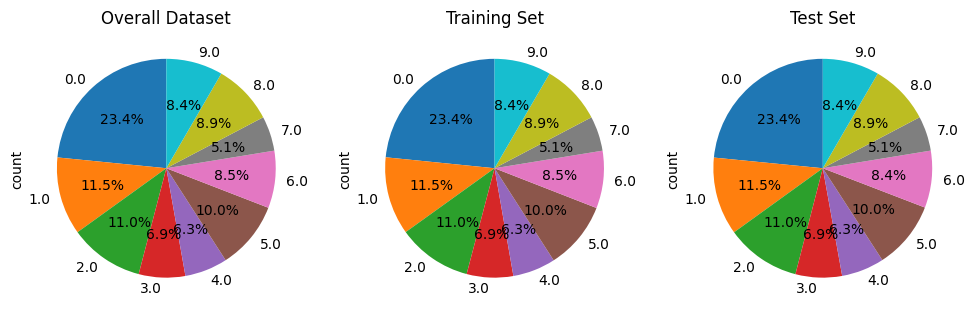

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

s_train = pd.DataFrame(y_train, columns=['Satisfaction'])
s_test = pd.DataFrame(y_test, columns=['Satisfaction'])

sorted_train = s_train['Satisfaction'].value_counts().sort_index()
sorted_test = s_test['Satisfaction'].value_counts().sort_index()
sorted_data = data['Satisfaction'].value_counts().sort_index()

# Create a pie chart for the overall dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 2)
plt.title('Training Set')
sorted_train.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 3)
plt.title('Test Set')
sorted_test.plot.pie(autopct='%1.1f%%', startangle=90)

plt.subplot(1, 3, 1)
plt.title('Overall Dataset')
sorted_data.plot.pie(autopct='%1.1f%%', startangle=90)

plt.show()

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,-0.060592,-0.045706,-0.048202,-0.095571,-0.081044,0.008552,0.070602,0.070833,0.077706,0.043317,0.058301,0.178598,-0.353053,0.020718,0.022286,-0.057312,-0.025238,-0.016172
1,-0.060592,1.000000,0.613065,0.478298,0.683989,0.655011,0.581746,0.463741,0.253906,-0.133077,-0.071887,-0.019905,0.085375,0.126561,0.021197,-0.106987,0.152893,0.030903,-0.032341
2,-0.045706,0.613065,1.000000,0.463448,0.649277,0.657046,0.660545,0.369988,0.235324,-0.145609,-0.048304,-0.012475,0.067211,0.125988,0.111667,-0.138238,0.097009,-0.021414,0.012469
3,-0.048202,0.478298,0.463448,1.000000,0.590021,0.553329,0.380810,0.249060,0.230409,-0.148049,-0.015574,-0.014885,0.103088,0.056037,0.073976,-0.101515,0.032971,0.032809,-0.033897
4,-0.095571,0.683989,0.649277,0.590021,1.000000,0.803380,0.638749,0.403094,0.236271,-0.194993,-0.075901,-0.040602,0.083018,0.206417,0.042096,-0.068237,0.057280,0.006025,-0.026836
5,-0.081044,0.655011,0.657046,0.553329,0.803380,1.000000,0.657007,0.386118,0.228734,-0.185215,-0.068066,-0.019963,0.072341,0.184570,0.085305,-0.102353,0.038865,0.009385,-0.019138
6,0.008552,0.581746,0.660545,0.380810,0.638749,0.657007,1.000000,0.454650,0.254216,-0.131042,-0.057194,-0.035401,0.066229,0.140529,0.119465,-0.146995,0.092652,-0.014594,0.004874
7,0.070602,0.463741,0.369988,0.249060,0.403094,0.386118,0.454650,1.000000,0.309410,-0.080460,0.036725,0.016366,0.073711,-0.056323,0.024743,-0.040232,0.057812,-0.016290,-0.014716
8,0.070833,0.253906,0.235324,0.230409,0.236271,0.228734,0.254216,0.309410,1.000000,-0.058464,0.000389,0.028611,0.004317,0.027657,0.077226,-0.077504,-0.004563,0.012930,0.001257
9,0.077706,-0.133077,-0.145609,-0.148049,-0.194993,-0.185215,-0.131042,-0.080460,-0.058464,1.000000,-0.277200,-0.154156,-0.258714,-0.231846,0.141255,-0.110704,-0.018864,-0.021710,-0.010535


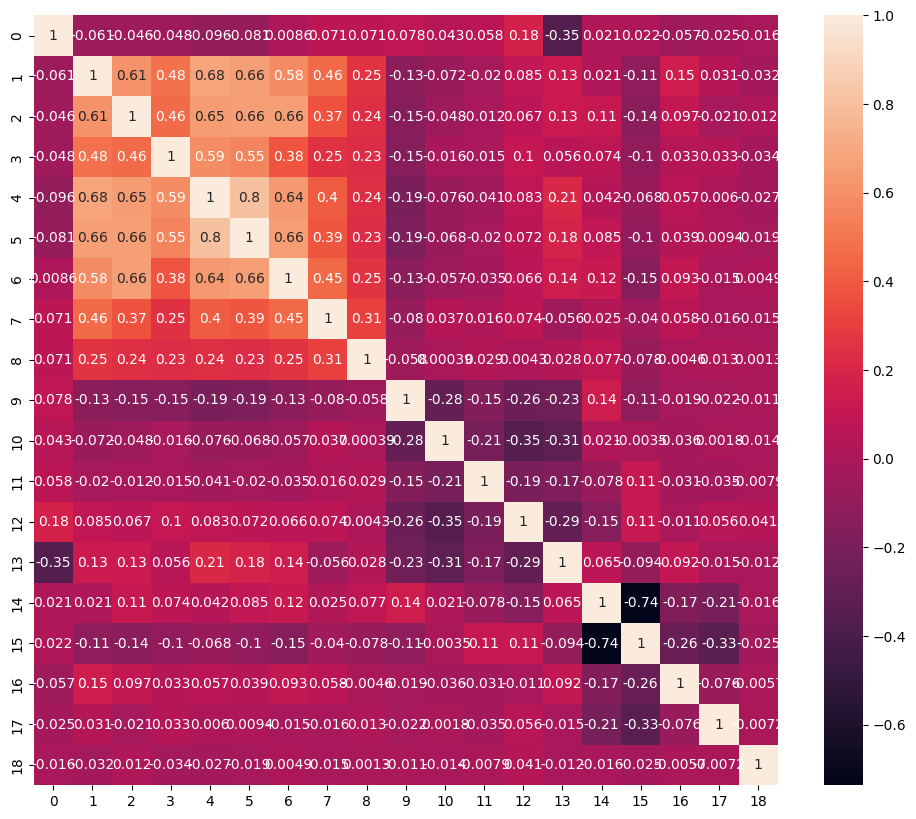

In [145]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

correlation_matrix = pd.DataFrame(x_train).corr()
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True ,ax=ax)
correlation_matrix

In [146]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = pd.DataFrame(dataset, columns=col).corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [147]:
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

x_train = x_train.drop(x_train.columns[to_drop], axis=1)
x_test = x_test.drop(x_test.columns[to_drop], axis=1)

[]


In [148]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(32,64,32), max_iter=300, activation='relu', solver='adam', random_state=42)
mlp.fit(x_train, y_train)
predict = mlp.predict(x_test)

c:\anaconda3\envs\pyenv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [149]:
def plot_cm(matrix, title): 
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

    ax.set_title(f'Confusion Matrix {title}', pad=10);
    plt.show()

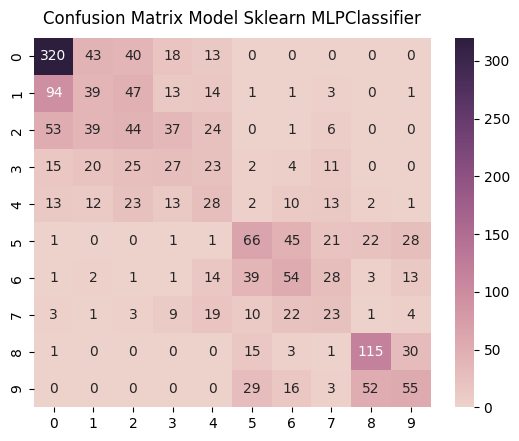

,precision,recall,f1-score,support
0.0,0.638723,0.737327,0.684492,434.000000
1.0,0.250000,0.183099,0.211382,213.000000
2.0,0.240437,0.215686,0.227390,204.000000
3.0,0.226891,0.212598,0.219512,127.000000
4.0,0.205882,0.239316,0.221344,117.000000
5.0,0.402439,0.356757,0.378223,185.000000
6.0,0.346154,0.346154,0.346154,156.000000
7.0,0.211009,0.242105,0.225490,95.000000
8.0,0.589744,0.696970,0.638889,165.000000
9.0,0.416667,0.354839,0.383275,155.000000


In [150]:
from sklearn.metrics import confusion_matrix, classification_report

confussion_matrix = confusion_matrix(y_test, predict)
plot_cm(confussion_matrix, 'Model Sklearn MLPClassifier')

model1_report = classification_report(y_test, predict, output_dict=True)
pd.DataFrame(model1_report).transpose()